In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from sklearn.model_selection import train_test_split

DATA UNDERSTANDING / EDA

In [2]:
# Read Manufacturing Operation Data (Feature Data/Sensor Data)
sensor_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data",sep=" ", header=None)
sensor_data

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [3]:
# Add prefix "feature" to each column
sensor_data = sensor_data.add_prefix("feature")

In [4]:
# Create dataframe for descriptive analysis 
descriptive_sensor = sensor_data.describe().transpose()

# Add column for total count of unique values of each column
descriptive_sensor["unique"] = sensor_data.nunique()

# Add column for percentage of missing values of each column
descriptive_sensor["missing_percentage"] = sensor_data.isnull().sum() * 100 / len(sensor_data)

# Add column for variance of each column
descriptive_sensor["coeff_var"] = descriptive_sensor["std"]/np.absolute(descriptive_sensor["mean"])

descriptive_sensor

,count,mean,std,min,25%,50%,75%,max,unique,missing_percentage,coeff_var
feature0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500,1520,0.382897,0.024423
feature1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400,1504,0.446713,0.032217
feature2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667,507,0.893427,0.013412
feature3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417,518,0.893427,0.316313
feature4,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366,503,0.893427,13.427535
...,...,...,...,...,...,...,...,...,...,...,...
feature585,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032,1502,0.063816,1.166309
feature586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028,322,0.063816,0.575912
feature587,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799,260,0.063816,0.534603
feature588,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286,120,0.063816,0.542663


C:\Users\Ellen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 10.0)

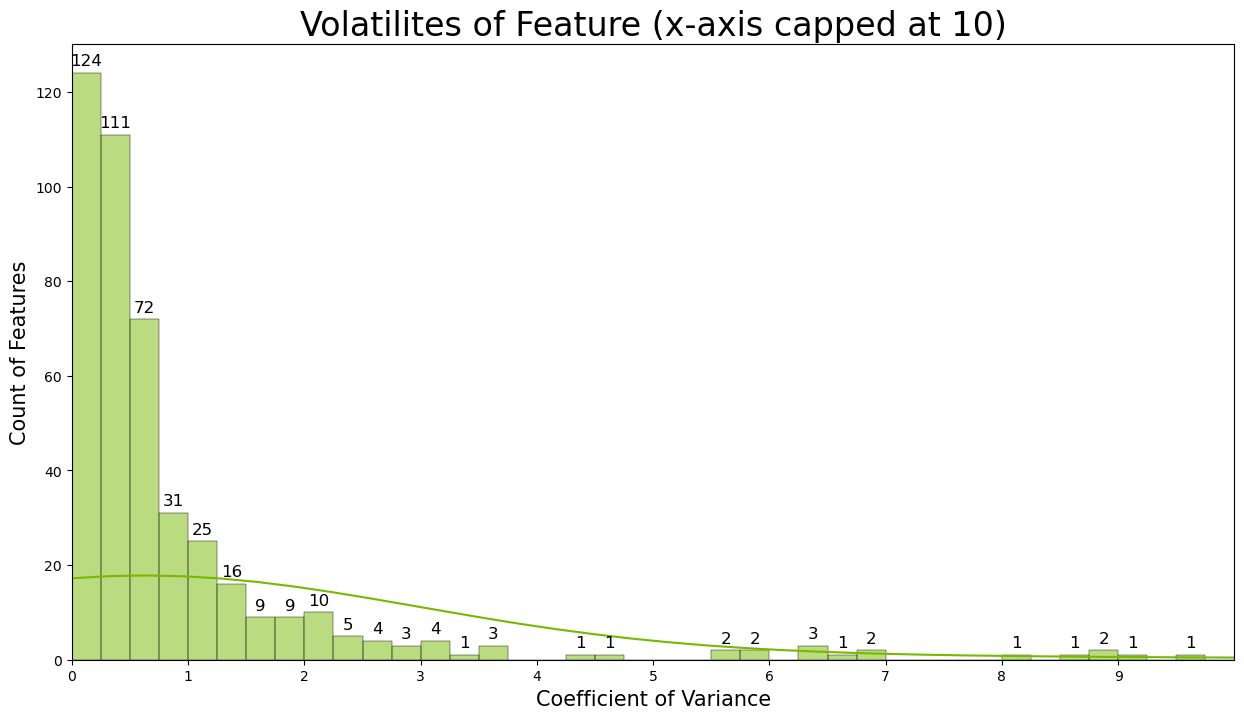

In [6]:
# Plot histogram of volatilities of features
plt.figure(figsize = (15,8))
volatilities = sns.histplot(descriptive_sensor, x="coeff_var", kde=True, binwidth=0.25, color="#76B900")
volatilities.set_title('Volatilites of Feature (x-axis capped at 10)', fontdict={'size':24})
volatilities.set_xlabel('Coefficient of Variance',fontdict={'size':15})
volatilities.set_ylabel('Count of Features', fontdict={'size':15})
volatilities.set_xticks(range(0,10,1))

for c in volatilities.containers:

    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]

    # set the bar label
    volatilities.bar_label(c, labels=labels, fontsize=12, padding=3)

plt.xlim(0,10)

C:\Users\Ellen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 100.0)

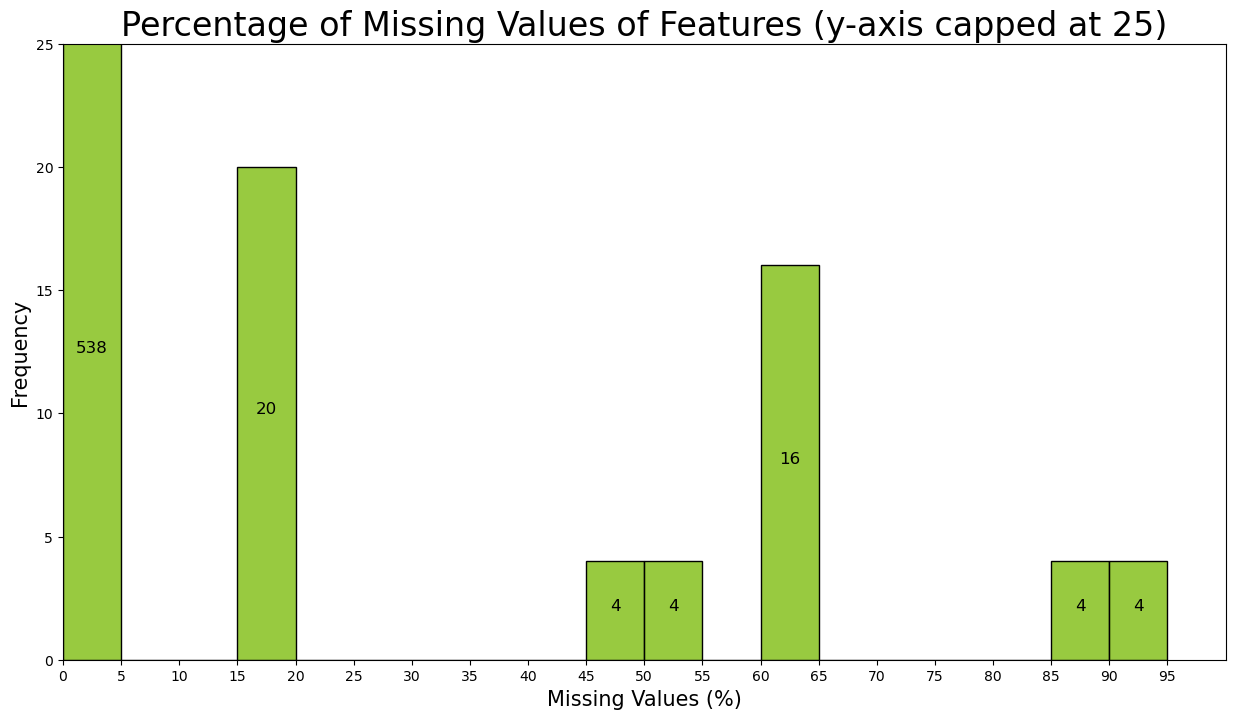

In [9]:
# Plot histogram of misisng values
plt.figure(figsize = (15,8))

missingval = sns.histplot(descriptive_sensor, x="missing_percentage", binwidth=5, stat='count',legend=True,color="#76B900" )
missingval.set_title('Percentage of Missing Values of Features (y-axis capped at 25)', fontdict={'size':24})
missingval.set_xlabel('Missing Values (%)',fontdict={'size':15})
missingval.set_ylabel('Frequency', fontdict={'size':15})
missingval.set_xticks(range(0,100,5))

for c in missingval.containers:

    # customize the label to account for cases when there might not be a bar section
    labels = [f'{h:0.0f}' if (h := v.get_height()) != 0 else '' for v in c ]

    # set the bar label
    missingval.bar_label(c, labels=labels, fontsize=12, padding=3,label_type='center')

plt.ylim(0, 25)
plt.xlim(0,100)

In [10]:
# Find features with zero coefficient of variance
constant_columns = descriptive_sensor[descriptive_sensor["coeff_var"]==0].index
constant_columns

Index(['feature5', 'feature42', 'feature49', 'feature69'], dtype='object')

In [11]:
# Select features having zero coefficient of variance
constant_columns = descriptive_sensor[descriptive_sensor["std"]==0].index
len(constant_columns)

116

In [12]:
# Select features having zero coefficient of variance
constant_columns = descriptive_sensor[descriptive_sensor["unique"]==1].index
len(constant_columns)

116

In [13]:
# Find duplicated records (row wise)
print("The number of duplicated rows: ", descriptive_sensor.duplicated().sum())

# Find rows with only one unique value
rows_with_one_unique_value = []
for index, row in descriptive_sensor.iterrows():
    if len(row.unique()) == 1:
        rows_with_one_unique_value.append(index)

print("Rows with only one unique value:", len(rows_with_one_unique_value))

The number of duplicated rows:  105
Rows with only one unique value: 0


          feature0  feature1  feature2  feature3  feature4  feature5  \
feature0  1.000000 -0.145071  0.004775 -0.007655 -0.011047       NaN   
feature1 -0.145071  1.000000  0.005802 -0.007603 -0.001641       NaN   
feature2  0.004775  0.005802  1.000000  0.298935  0.095891       NaN   
feature3 -0.007655 -0.007603  0.298935  1.000000 -0.058483       NaN   
feature4 -0.011047 -0.001641  0.095891 -0.058483  1.000000       NaN   

          feature6  feature7  feature8  feature9  ...  feature580  feature581  \
feature0  0.002281  0.031510 -0.052731  0.009052  ...   -0.070137   -0.028380   
feature1 -0.025702 -0.012084  0.031321  0.024015  ...    0.073211    0.083463   
feature2 -0.136225 -0.273970  0.023609  0.016291  ...   -0.018721   -0.010759   
feature3 -0.685835  0.138290 -0.103656  0.068998  ...   -0.057051   -0.096619   
feature4 -0.074368 -0.916410 -0.026035  0.054619  ...   -0.041290    0.088327   

          feature582  feature583  feature584  feature585  feature586  \
feature0

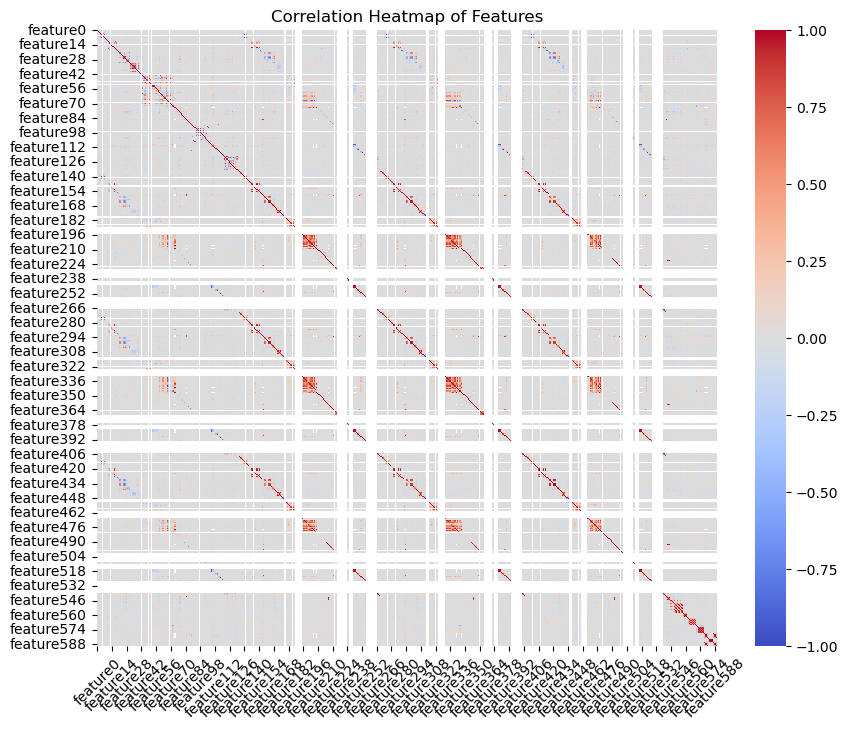

In [23]:
# Plot correlation heatmap
correlation_matrix = sensor_data.corr()
print(correlation_matrix.head())

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.show()

In [14]:
# Read semiconductor quality data (target)
target_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data",sep=" ",header=None)
target_data

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
...,...,...
1562,-1,16/10/2008 15:13:00
1563,-1,16/10/2008 20:49:00
1564,-1,17/10/2008 05:26:00
1565,-1,17/10/2008 06:01:00


In [15]:
# Change column names
target_data.columns = ["Label","Time"]

# Convert type of columns
target_data["Label"] = target_data["Label"].astype("category")

# Convert format of Time Column as datetime
target_data["Time"] = pd.to_datetime(target_data["Time"])

target_data

C:\Users\Ellen\AppData\Local\Temp\ipykernel_5316\228364538.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  target_data["Time"] = pd.to_datetime(target_data["Time"])


,Label,Time
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00
...,...,...
1562,-1,2008-10-16 15:13:00
1563,-1,2008-10-16 20:49:00
1564,-1,2008-10-17 05:26:00
1565,-1,2008-10-17 06:01:00


Text(0.5, 1.0, 'Distribution of Target Variable')

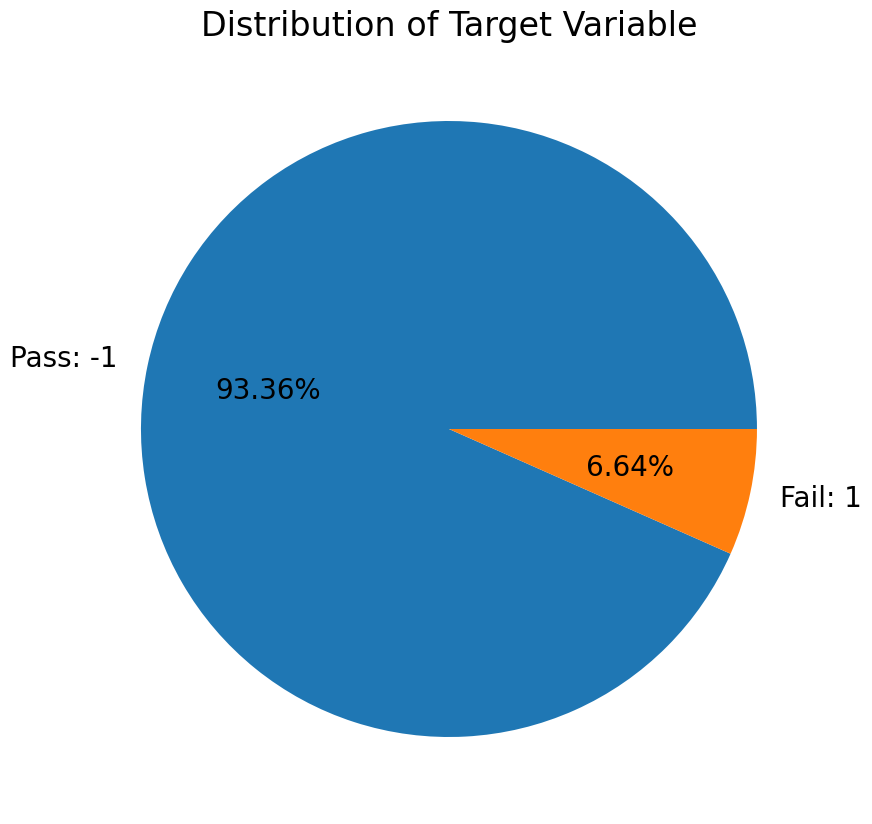

In [20]:
# Find frequency distribution of target variable
# Set size of chart
plt.figure(figsize = (10,10))

# Labels for data
keys = ['Pass: -1','Fail: 1']

# Plotting data on Pie chart
Piechart_Labels = plt.pie(target_data.Label.value_counts(), labels=keys, autopct='%.2f%%', textprops={'fontsize': 20})

# Add title to the chart
plt.title('Distribution of Target Variable',fontdict={'size':24})

In [16]:
import datetime as dt

# Create a Date column from Time (timestamp) Column of Label Data 
target_data["Date"] = target_data["Time"].dt.date

# check first and last dates of Label Data
print("first date = {}".format(target_data["Date"].min()))
print("last date = {}".format(target_data["Date"].max()))

first date = 2008-07-19
last date = 2008-10-17


DATA PREPARATION

In [22]:
# Merge sensor and label data
merged_df = pd.concat([target_data,sensor_data],axis=1)
merged_df.drop(["Date","Time"], axis=1, inplace=True)

# Convert labels into text categories
merged_df["Label"] = merged_df["Label"].replace({-1:"PASS", 1:"FAIL"})

# Create training and test datasets
X = merged_df.drop(["Label"],axis=1)
Y = merged_df["Label"]

# Split data into train and test by 75%-25% in a stratified fashion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, stratify=Y)

merged_df

,Label,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589
0,PASS,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,PASS,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,FAIL,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,PASS,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,PASS,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,PASS,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,PASS,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,PASS,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,PASS,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


Text(0.5, 1.0, 'Distribution of Target Labels (Train Set)')

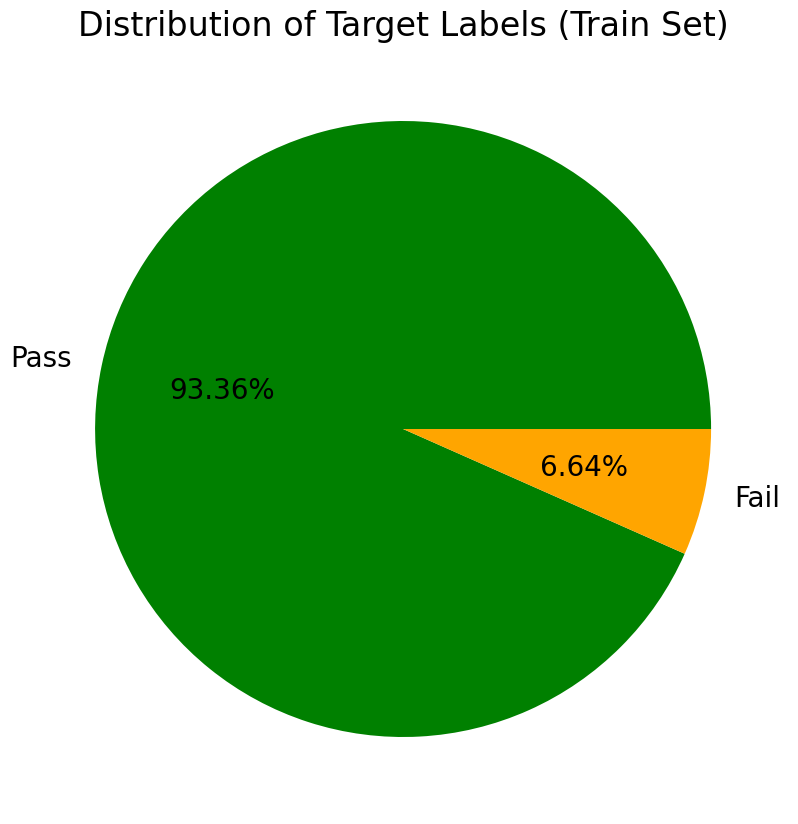

In [27]:
# Visualize descriptive statistics of train data
# Set size of chart
plt.figure(figsize = (10,10))

# Labels for data
keys = ['Pass','Fail']
colors = ['green', 'orange']

# Plotting data on Pie chart
Piechart_Labels_train = plt.pie(Y_train.value_counts(), labels=keys, autopct='%.2f%%', textprops={'fontsize': 20}, colors=colors)

# Add title to the chart
plt.title('Distribution of Target Labels (Train Set)',fontdict={'size':24})

Text(0.5, 1.0, 'Distribution of Target Labels (Test Set)')

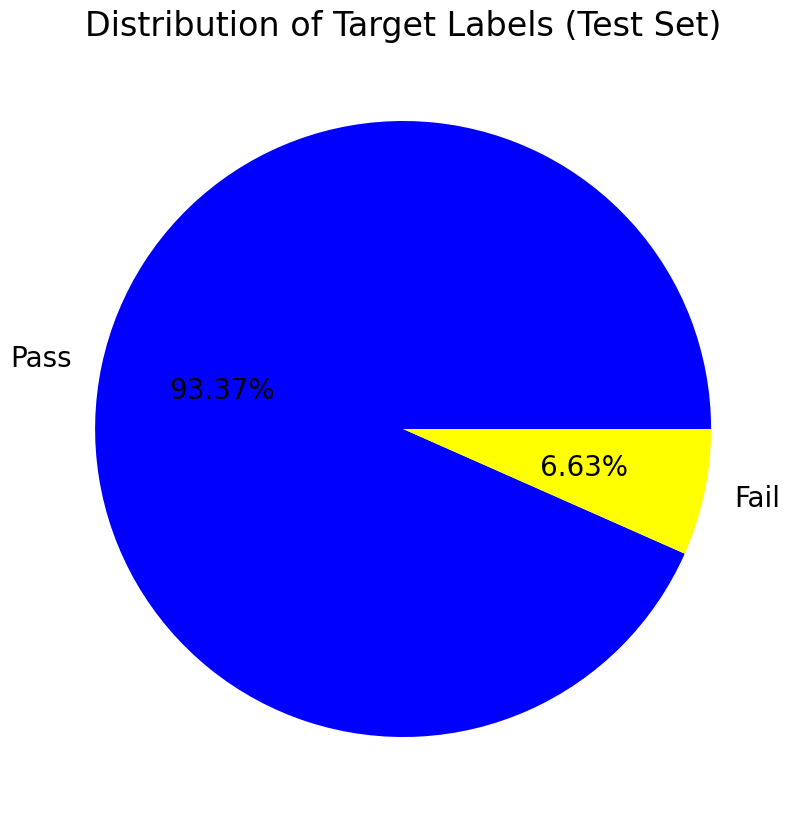

In [28]:
# Visualize descriptive statistics of test data
# Set size of chart
plt.figure(figsize = (10,10))

# Labels for data
keys = ['Pass','Fail']
colors = ['blue', 'yellow']

# Plotting data on Pie chart
Piechart_Labels_train = plt.pie(Y_test.value_counts(), labels=keys, autopct='%.2f%%', textprops={'fontsize': 20}, colors=colors)

# Add title to the chart
plt.title('Distribution of Target Labels (Test Set)',fontdict={'size':24})

In [29]:
print("shape of feature train set :{} and shape of feature test set: {}".format(X_train.shape, X_test.shape))
print("shape of target train set :{} and shape of target test set: {}".format(Y_train.shape, Y_test.shape))

shape of feature train set :(1175, 590) and shape of feature test set: (392, 590)
shape of target train set :(1175,) and shape of target test set: (392,)


In [ ]:
# Descriptive statistics of X_train set

In [ ]:
# Plot histogram of missing values (%) in X_train set


In [ ]:
# Plot histogram of volatilities of features in X_train set


In [ ]:
# Find duplicated columns


In [ ]:
# Define function for outlier identification in the train set based on 3s bounds
def identify_outliers_3s(df):
   
    # Calculate mean and standard deviation
    mean = df.mean()
    std_dev = df.std()
    
    # Define boundaries for outliers
    upper_bound = mean + 3 * std_dev
    lower_bound = mean - 3 * std_dev
    
    # Create a boolean mask for outliers
    outliers_mask = (df > upper_bound) | (df < lower_bound)

    # Print number and percentage of outliers in the datafame
    print("The total number of outliers in the training dataset based on 3s bounds: ", outliers_mask.sum().sum())
    print("The percentage of outliers in the training dataset: ", outliers_mask.sum().sum()/df.sum().sum() * 100, "%")
    

In [ ]:
# Plot histogram of outliers


In [ ]:
# Visualization of missing values by percentage

In [ ]:
# Remove features with more than 70% of missing values


In [ ]:
# Missing value imputation #1: kNN
from sklearn.impute import KNNImputer

def imputeKNN(df, nn):
    # We copy the dataframe to preserve it
    df_imputed = df.copy()
    # We create kNN object with "nn" neighbor number (5 as standard)
    knn_imputer = KNNImputer(n_neighbors=nn)
    # We made imputation fitting
    df_imputed = knn_imputer.fit_transform(df)
    # Turn into new dataframe
    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
    # Return imputed dataframe
    df_imputed.index = df.index
    return df_imputed

In [ ]:
# Missing value impuration #2: MICE
def imputeMICE(df):

    # We copy the dataframe to preserve it
    df_imputed = df.copy()
    # We create object IterativeImputer
    mice_imputer = IterativeImputer(sample_posterior=False, random_state=100)
    # We make MICE Imputation
    df_imputed.iloc[:, :] = mice_imputer.fit_transform(df)
    # Return imputed DataFrame
    return df_imputed

In [ ]:
# Evaluation of imputation

FEATURE SELECTION

In [ ]:
# Feature selection method #1: BORUTA (wrapper)
from boruta import BorutaPy


In [ ]:
# Feature selection method #2: LASSO (embedded)
from sklearn.linear_model import Lasso



In [ ]:
# Featrue selection method #3: RIDGE (embedded)

In [ ]:
# PLot correlation matrix of selected features